### Code couleur: Noir = Titre et Text,  <font color='green'>Vert = Conclusion</font>

### Import des librairies

In [96]:
#Librairie:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from functions import *

### Import & Cleaning 

##### Import data:

In [97]:
df = pd.read_csv('p10_data.csv', delimiter=';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


##### Info:

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


##### Description:

In [99]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


##### Duplicat:

In [100]:
df.duplicated().sum()

0

##### Valeur manquante:

In [101]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

##### Remplacement des valeurs manquantes:

In [102]:
df = df.fillna(0)

##### Check valeur manquante:

In [103]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

##### Transformation de la variable is_genuine en valeur binaire:

In [104]:
df['is_genuine'] = df['is_genuine'].replace({True:1, False:0})
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


##### Data types:

In [105]:
df.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

##### Dataframe comprenant les valeurs manquantes:

In [106]:
null_value = df[df['margin_low']==0]
null_value

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,0.0,3.25,112.79
99,1,171.93,104.07,104.18,0.0,3.14,113.08
151,1,172.07,103.80,104.38,0.0,3.02,112.93
197,1,171.45,103.66,103.80,0.0,3.62,113.27
241,1,171.83,104.14,104.06,0.0,3.02,112.36
251,1,171.80,103.26,102.82,0.0,2.95,113.22
284,1,171.92,103.83,103.76,0.0,3.23,113.29
334,1,171.85,103.70,103.96,0.0,3.00,113.36
410,1,172.56,103.72,103.51,0.0,3.12,112.95
413,1,172.30,103.66,103.50,0.0,3.16,112.95


##### Dataframe ne comprenant pas les valeurs manquantes:

In [107]:
df2 = df[df['margin_low']>0]
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


##### Corrélation:

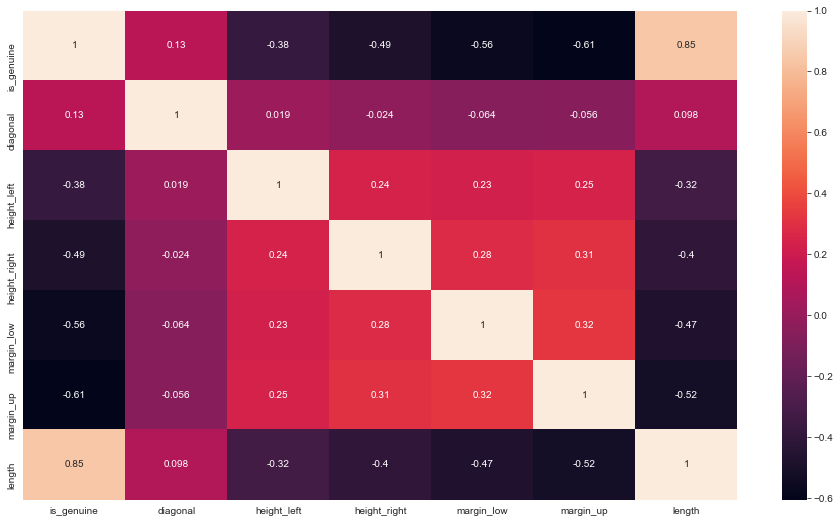

In [108]:
plt.figure(figsize=(16,9))

sns.heatmap(df.corr(), annot=True)

plt.show()

#### <font color='green'>La heatmap permet de mettre en relief les corrélations observables dans le dataframe. Dans cette heatmap, on peut mettre en évidence un lien positif fort entre la variable lenght et is_genuine. Mais aussi, un lien négatif faible entre les variable margin_up, margin_low et is_genuine.</font>

### Regression linéaire

#### La régression linéaire va permettre de déterminer les valeurs manquantes par rapport aux autres variables du Dataframe.

##### Séparation du dataset en 2 dataframe:

In [109]:
X = df2.drop(['margin_low'], axis=1)
y = df2[['margin_low']]

##### Train Test Split:

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##### Regression linéaire:

In [111]:
linReg = LinearRegression()

##### Ajuster & Prédire:

In [112]:
linReg.fit(X_train, y_train)

LinearRegression()

##### Coefficents directeurs & Ordonnée à l'origine:

In [113]:
a = linReg.coef_
b = linReg.intercept_
print(a,b)

[[-1.144095    0.01967823 -0.0191869  -0.00344321 -0.13843984 -0.00222656]] [4.90473901]


##### Différence entre les valeurs prédites et observées:

##### Jeu d'entraînement:

In [114]:
y_train_pred = linReg.predict(X_train)

In [115]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred))) 

RMSE:  0.4091759960878095


##### Jeu de test:

In [116]:
y_pred = linReg.predict(X_test)

In [117]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  0.41787677258482514


##### Prédire les valeurs manquantes d'après le model:

In [118]:
X_null = null_value.drop(['margin_low'], axis=1)
y_null = linReg.predict(X_null)

##### Reformer le dataframe avec les valeurs manquantes ajoutées:

In [119]:
X_null['y_null'] = y_null
X_null = X_null.rename(columns={'y_null':'margin_low'})
X_null

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,1,171.94,103.89,103.45,3.25,112.79,4.093528
99,1,171.93,104.07,104.18,3.14,113.08,4.101947
151,1,172.07,103.80,104.38,3.02,112.93,4.126141
197,1,171.45,103.66,103.80,3.62,113.27,4.034802
241,1,171.83,104.14,104.06,3.02,112.36,4.117265
251,1,171.80,103.26,102.82,2.95,113.22,4.145605
284,1,171.92,103.83,103.76,3.23,113.29,4.094874
334,1,171.85,103.70,103.96,3.00,113.36,4.126988
410,1,172.56,103.72,103.51,3.12,112.95,4.126425
413,1,172.30,103.66,103.50,3.16,112.95,4.116957


##### Reformer le dataframe principal:

In [120]:
df3 = pd.concat([df2, X_null])
df3

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.277389,2.93,111.21
1315,0,172.08,104.15,104.17,5.213258,3.40,112.29
1347,0,171.72,104.46,104.12,5.175734,3.61,110.31
1435,0,172.66,104.33,104.41,5.200067,3.56,111.47


##### Descirption du dataframe:

In [121]:
df3.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482867,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659761,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### Split values, labels:

##### Séparation du dataset en 2 dataframe:

In [122]:
X = df3.iloc[:,1:]
y = df3[['is_genuine']]

### Distribution

#### Visualisation des distributions à l'aide d'histogrammes pour vérifier la forme des variables.

In [123]:
def distribution(item):

    for i in item.iloc[:,:]:
        plt.figure(figsize=(16,9))
        sns.distplot(item[i])
        plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


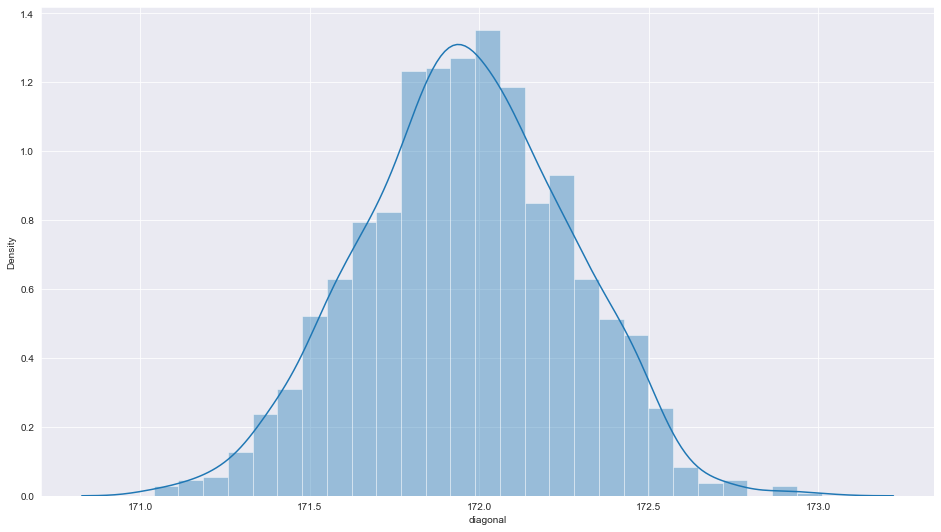

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


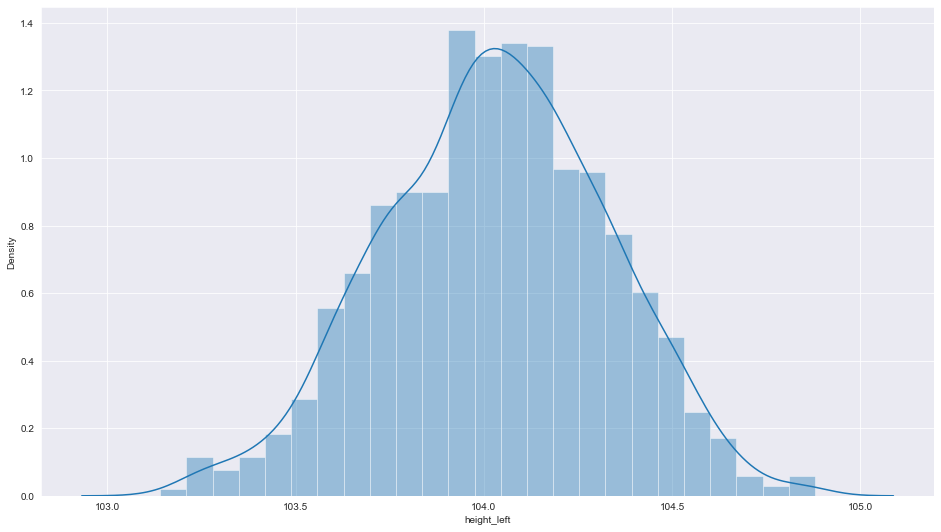

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


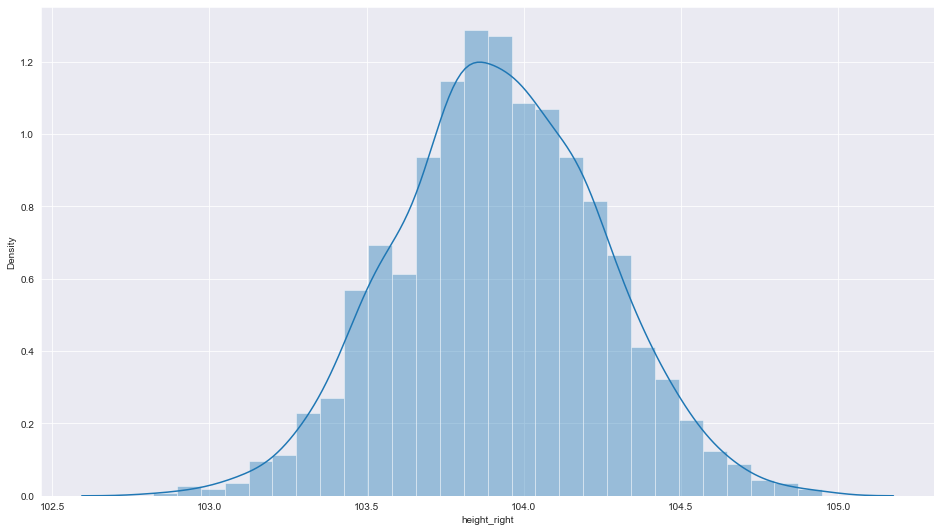

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


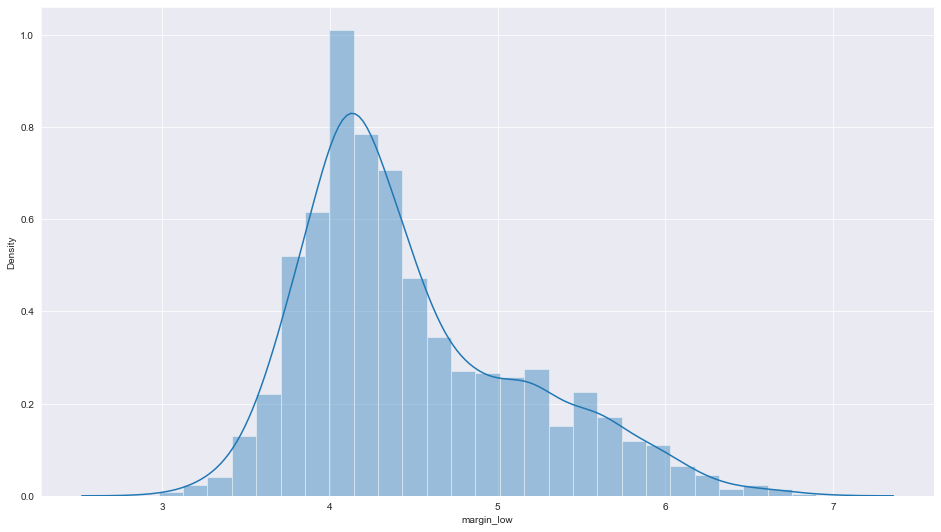

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


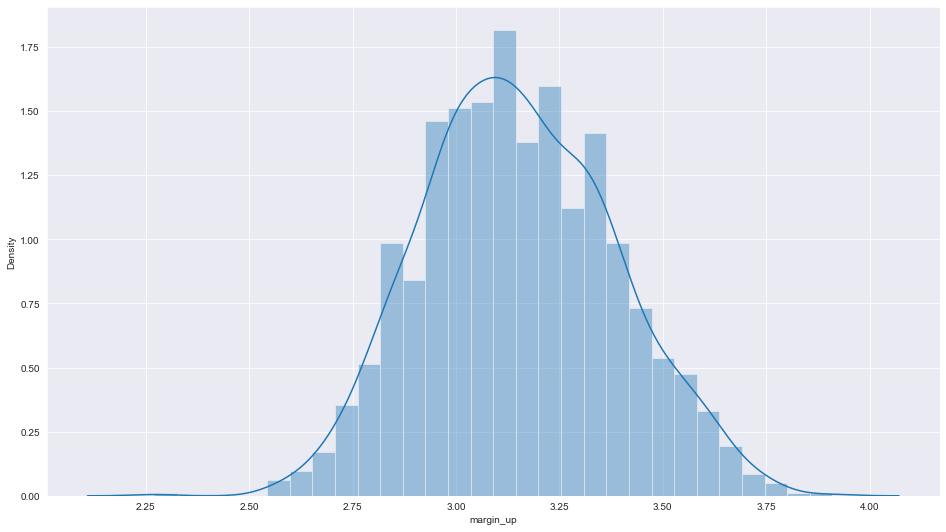

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


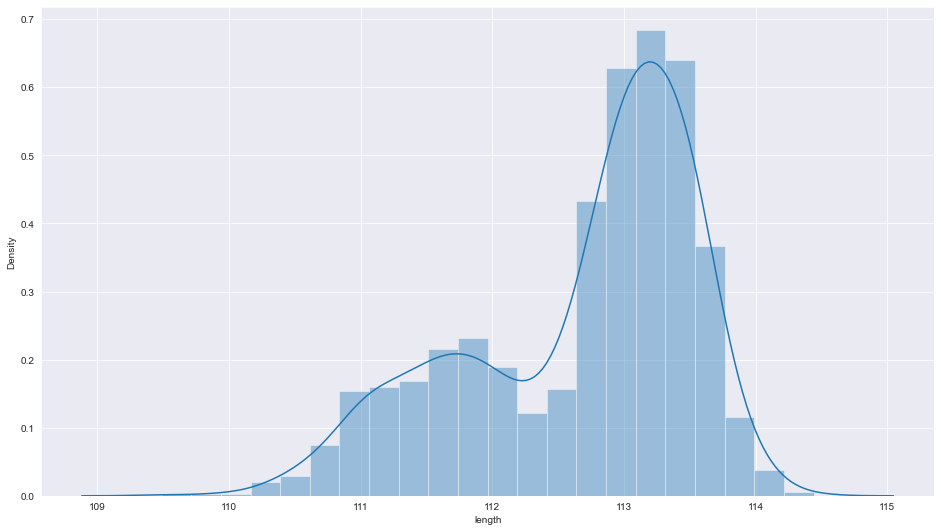

In [124]:
distribution(X)

#### <font color='green'>Les histogrammes, permettent de mieux se représenter la forme des variables et les valeurs qui les composent. Cela nous donne du contexte et une meilleure compréhension des données.</font>

### Normality test:

#### Les tests de normalité permettent de s'assurer que la distribution des variables est gaussienne ou non. Le test de normalité nous aide à bien définir les traitements à appliquer en fonction des résultats obtenus.

#### Test D’Agostino and Pearson’s:

In [125]:
#NormalTest:

alpha = 0.05

for i in X.iloc[:,:]:
    stat, pvalue = stats.normaltest(X[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

0.5262691448948474
The data is gaussian
0.08668791850090003
The data is gaussian
0.9875807688260532
The data is gaussian
3.08925873901489e-33
The data is not gaussian
0.0067538346667370625
The data is not gaussian
1.5877066154685026e-30
The data is not gaussian


#### Test Shapiro-Wilk:

In [126]:
#ShapiroTest:

alpha = 0.05

for i in X.iloc[:,:]:
    stat, pvalue = stats.shapiro(X[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

0.323654443025589
The data is gaussian
0.051517147570848465
The data is gaussian
0.9806451797485352
The data is gaussian
5.965654592549763e-25
The data is not gaussian
0.000814208120573312
The data is not gaussian
7.865591300479774e-28
The data is not gaussian


#### <font color='green'>Ces deux tests ont donné du sens au histogramme. De plus, on retrouve des résultats équivalents dans les deux tests ce qui renforce leurs fiabilités.</font>

### New Dataframe:

##### Traitement des valeurs extrêmes:

In [127]:
X2 = X[(np.abs(stats.zscore(X)<3)).all(axis=1)]
X2

,diagonal,height_left,height_right,margin_low,margin_up,length
1,171.46,103.36,103.66,3.770000,2.99,113.09
2,172.69,104.48,103.50,4.400000,2.94,113.16
3,171.36,103.91,103.94,3.620000,3.01,113.51
4,171.73,104.28,103.46,4.040000,3.48,112.54
5,172.17,103.74,104.08,4.420000,2.95,112.81
...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.277389,2.93,111.21
1315,172.08,104.15,104.17,5.213258,3.40,112.29
1347,171.72,104.46,104.12,5.175734,3.61,110.31
1435,172.66,104.33,104.41,5.200067,3.56,111.47


##### Info:

In [128]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 1 to 1438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1484 non-null   float64
 1   height_left   1484 non-null   float64
 2   height_right  1484 non-null   float64
 3   margin_low    1484 non-null   float64
 4   margin_up     1484 non-null   float64
 5   length        1484 non-null   float64
dtypes: float64(6)
memory usage: 81.2 KB


##### Description:

In [129]:
X2.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,171.957082,104.028208,103.916267,4.466981,3.150061,112.687204
std,0.301536,0.299063,0.323373,0.638751,0.231108,0.868373
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.490000
25%,171.750000,103.820000,103.700000,4.020000,2.990000,112.060000
50%,171.960000,104.040000,103.910000,4.300000,3.140000,112.970000
75%,172.170000,104.230000,104.142500,4.852500,3.310000,113.350000
max,172.760000,104.880000,104.870000,6.380000,3.810000,114.440000


### Standardization:

#### La standardisation sert à mettre les données à la même échelle pour optimisation des futurs traitements.

##### Standardize Data:

In [130]:
scaler = StandardScaler()
z = scaler.fit_transform(X2)
data = pd.DataFrame(z)
data = data.rename(columns={
    0:'diagonal',
    1:'height_left',
    2:'height_right',
    3:'margin_low',
    4:'margin_up',
    5:'length'
})

data

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-1.649055,-2.235088,-0.792748,-1.091531,-0.692813,0.464008
1,2.431432,1.511201,-1.287699,-0.104898,-0.909235,0.544646
2,-1.980802,-0.395393,0.073417,-1.326444,-0.606244,0.947835
3,-0.753338,0.842221,-1.411437,-0.668688,1.428123,-0.169574
4,0.706348,-0.964026,0.506500,-0.073577,-0.865951,0.141458
...,...,...,...,...,...,...
1479,0.706348,1.544650,-0.483403,1.269166,-0.952520,-1.701690
1480,0.407776,0.407384,0.784910,1.168732,1.081848,-0.457565
1481,-0.786513,1.444303,0.630237,1.109967,1.990821,-2.738461
1482,2.331908,1.009466,1.527337,1.148074,1.774399,-1.402179


### PCA

#### L'algorithme de l'Analyse en composante principal permet de réduire le jeu de donnée tout en gardant un maximum d'informations.

##### Decomposition:

In [131]:
pca = PCA()
pca.fit_transform(data)

print('Ratio de Variance:', pca.explained_variance_ratio_)
print('Valeurs par Axes:', pca.singular_values_)

Ratio de Variance: [0.43176566 0.16994085 0.12959734 0.11864775 0.09689037 0.05315803]
Valeurs par Axes: [62.00356006 38.89927118 33.96961443 32.5029166  29.37195643 21.75589862]


##### Représentation des différentes composantes dans un dataframe:

In [132]:
eigen = pd.DataFrame(
    {
        'dimension': ['PC' + str(x+1) for x in range(6)],
        'variancre expliquée': pca.explained_variance_,
        '% variance expliquée': np.round(pca.explained_variance_ratio_ *100),
        '% cum. var. expliquée': np.round(np.cumsum(pca.explained_variance_ratio_ )* 100),
    }
)
eigen

,dimension,variancre expliquée,% variance expliquée,% cum. var. expliquée
0,PC1,2.592341,43.0,43.0
1,PC2,1.020333,17.0,60.0
2,PC3,0.778108,13.0,73.0
3,PC4,0.712367,12.0,85.0
4,PC5,0.581734,10.0,95.0
5,PC6,0.319163,5.0,100.0


##### Visualisation du poids de l'information contenu dans chaque composantes:

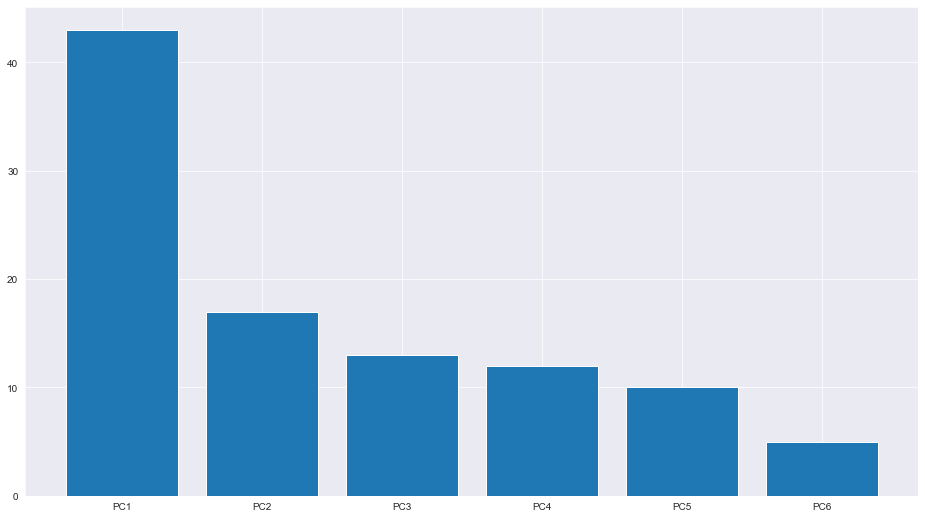

In [133]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))

plt.bar(eigen['dimension'], eigen['% variance expliquée'] )

plt.show()

#### <font color='green'>La PCA effectuée nous indique que les 4 premières composantes semble être le choix qui s'impose. En effet, en gardant les 4 premières composantes, on minimise la perte d'information à hauteur de 15%. De plus, on passe de 7 à 4 dimensions, ce qui facilitera le travail effectué par les algorithmes de clustering. </font>

##### Heatmap:

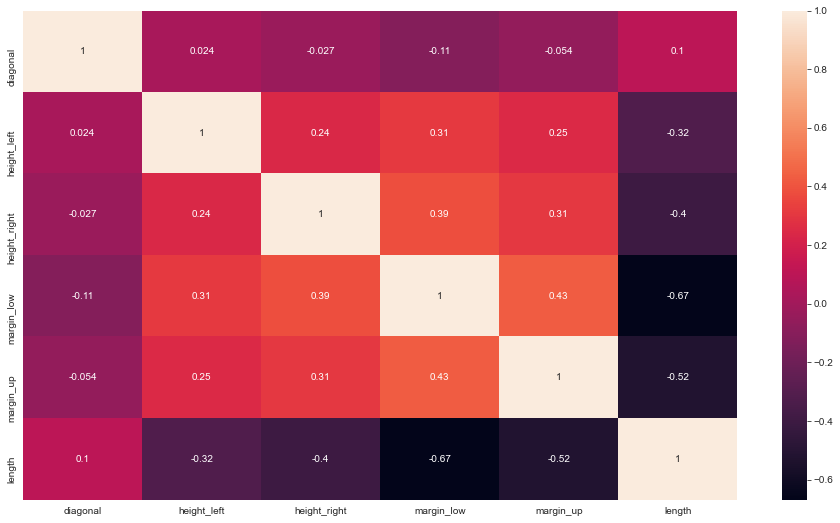

In [134]:
plt.figure(figsize=(16, 9))

sns.heatmap(data.corr(), annot=True)

plt.show()

#### <font color='green'>La heatmap nous aide à interpréter les différents liens entre nos variables. Mais aussi, de donner du sens aux différentes corrélations observées.</font>

##### Préparations des données pour interpréter les composantes:

In [135]:
pcs = pca.components_
names = y
features = data.columns
n_comp = 6

##### Visualisation des cercles de corrélations:

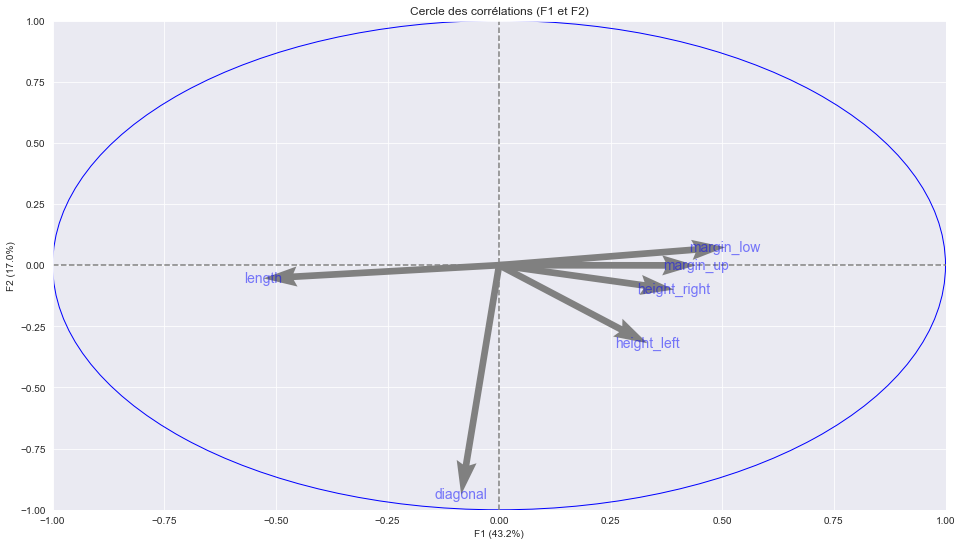

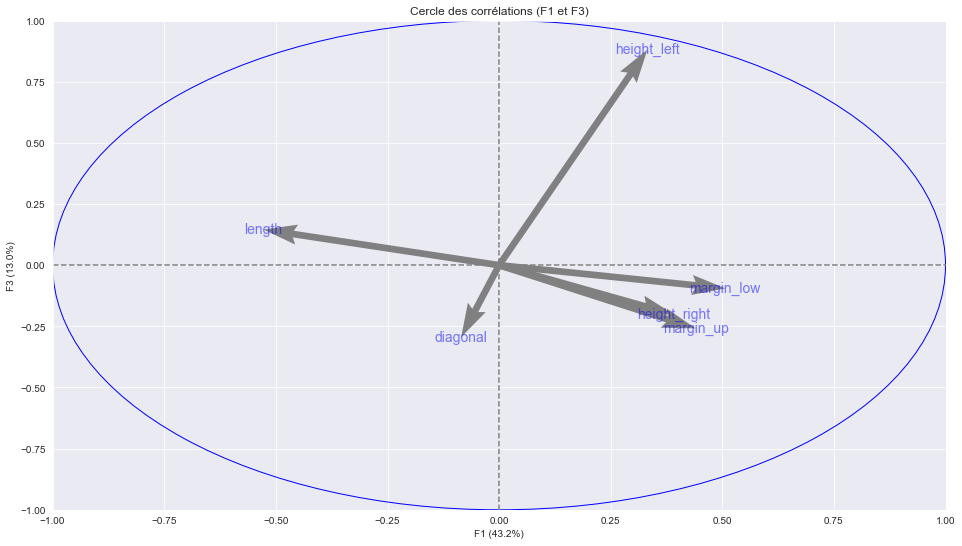

In [136]:
display_circles(pcs, n_comp, pca, [(0,1),(0,2)], labels=np.array(features))

#### <font color='green'>Les cercles de corrélations, nous offrent la possibilité de donner du sens à nos composantes principal. En effet, on peut observer ici que la PC1 est représentée par les variables margin_low, margin_up et length. La PC2, elle est représentée par la diagonal, la PC3 par height_left et pour terminer la PC4 par la height_right.</font>

##### PCA avec le nombres de composantes choisies:

In [137]:
pca2 = PCA(4)
pca_data = pca2.fit_transform(data)
pca_data

array([[-2.01575201,  2.23452802, -0.97454232, -0.01874592],
       [-0.94982212, -2.67096537,  1.20044673,  0.88516024],
       [-1.37345144,  1.82884061,  0.63953932, -0.87017069],
       ...,
       [ 3.67755376,  0.44186245,  0.35793077,  0.87864252],
       [ 2.83827116, -2.50330393, -0.87528442,  0.09647522],
       [ 2.25382369, -0.04433314,  0.14978563, -0.45660664]])

##### Dataframe:

In [138]:
pca_data = pd.DataFrame(pca_data)

pca_data.columns = ['PC1', 'PC2', 'PC3', 'PC4']

pca_data

,PC1,PC2,PC3,PC4
0,-2.015752,2.234528,-0.974542,-0.018746
1,-0.949822,-2.670965,1.200447,0.885160
2,-1.373451,1.828841,0.639539,-0.870171
3,0.170648,0.537418,0.917296,1.726073
4,-0.675163,-0.417731,-0.907451,-0.780967
...,...,...,...,...
1479,1.385347,-0.921228,1.128512,0.554430
1480,1.718041,-0.481192,-0.376196,0.052336
1481,3.677554,0.441862,0.357931,0.878643
1482,2.838271,-2.503304,-0.875284,0.096475


##### Ajout des labels

In [139]:
pca_data['target'] = y
pca_data

,PC1,PC2,PC3,PC4,target
0,-2.015752,2.234528,-0.974542,-0.018746,1
1,-0.949822,-2.670965,1.200447,0.885160,1
2,-1.373451,1.828841,0.639539,-0.870171,1
3,0.170648,0.537418,0.917296,1.726073,1
4,-0.675163,-0.417731,-0.907451,-0.780967,1
...,...,...,...,...,...
1479,1.385347,-0.921228,1.128512,0.554430,0
1480,1.718041,-0.481192,-0.376196,0.052336,0
1481,3.677554,0.441862,0.357931,0.878643,0
1482,2.838271,-2.503304,-0.875284,0.096475,0


#### <font color='green'>Une fois le traitement PCA terminé. On obtient, ce dataframe avec les 4 composantes déterminés plus la variable target.</font>

### KMeans

#### Le KMeans, est un algorithme de clustering non-supervisé. Il permet de créer k-clusters, en déterminant k-centroïdes tout en minimisant l'inertie intra-classe des clusters.

##### Data Prep:

In [140]:
z = pca_data.iloc[:,:4].copy()
y = pca_data[['target']]

##### Elbow:

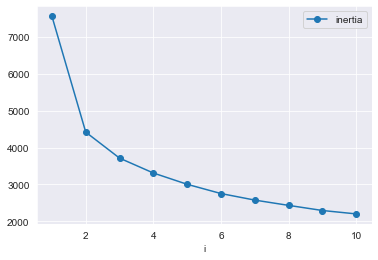

In [141]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', n_init=50).fit(z)
    inertia += [kmeans.inertia_]
    
inertia = pd.DataFrame({"i": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "i", y = "inertia", marker='o')

plt.show()

#### <font color='green'>Cette visualisation en forme de coude, aide à définir le nombre de k-clusters. Ici, le choix le plus probant est donc de 2 clusters.</font>

##### Clusters:

In [142]:
cluster = KMeans(n_clusters=2, init='k-means++')
cluster.fit_predict(pca_data)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

##### Labels:

In [143]:
Klabel = cluster.labels_
Klabel

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

##### Centroïdes:

In [144]:
centroide = cluster.cluster_centers_
print(centroide)

[[ 2.08295665  0.08198443 -0.09918745  0.10337649  0.07628866]
 [-1.01124522 -0.03980225  0.04815407 -0.05018779  0.96396396]]


##### Visualisation:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


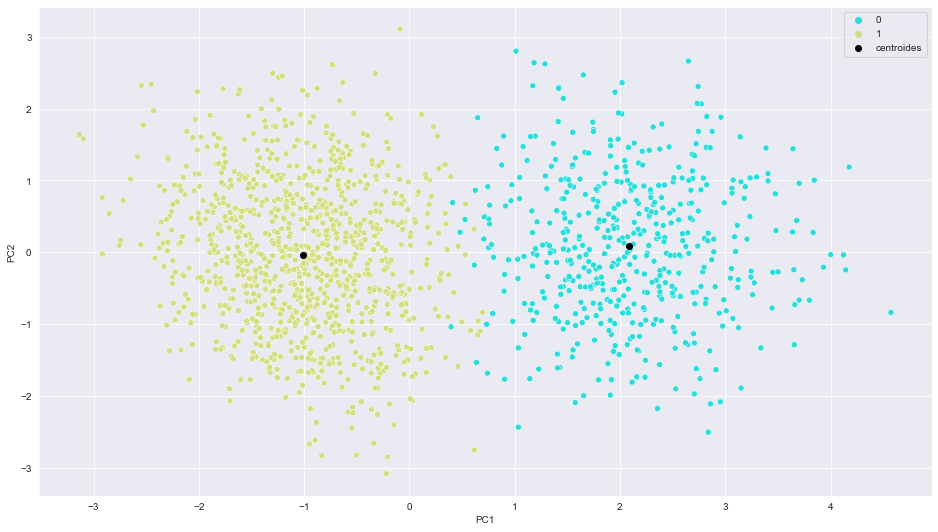

In [145]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))

sns.scatterplot(z.iloc[:,0] , z.iloc[:,1], hue=Klabel, palette='rainbow')
plt.scatter(centroide[:,0] , centroide[:,1], c='black', label='centroides')

plt.legend()

plt.show()

#### <font color='green'>Visualisation des clusters ainsi que leurs centroïdes respectifs. Cela permet de mieux comprendre comment on été influencé ses clusters en fonction des PC.</font>

##### Dataframe avec les Klabels:

In [146]:
Klabel = pd.DataFrame(Klabel, index=z.index, columns=['Klabels'])
Klabel

,Klabels
0,1
1,1
2,1
3,1
4,1
...,...
1479,0
1480,0
1481,0
1482,0


##### Ajout des Klabels au dataframe principal:

In [147]:
z['Klabels'] = Klabel
z

,PC1,PC2,PC3,PC4,Klabels
0,-2.015752,2.234528,-0.974542,-0.018746,1
1,-0.949822,-2.670965,1.200447,0.885160,1
2,-1.373451,1.828841,0.639539,-0.870171,1
3,0.170648,0.537418,0.917296,1.726073,1
4,-0.675163,-0.417731,-0.907451,-0.780967,1
...,...,...,...,...,...
1479,1.385347,-0.921228,1.128512,0.554430,0
1480,1.718041,-0.481192,-0.376196,0.052336,0
1481,3.677554,0.441862,0.357931,0.878643,0
1482,2.838271,-2.503304,-0.875284,0.096475,0


##### Ajout des targets:

In [148]:
z['target'] = y
z

,PC1,PC2,PC3,PC4,Klabels,target
0,-2.015752,2.234528,-0.974542,-0.018746,1,1
1,-0.949822,-2.670965,1.200447,0.885160,1,1
2,-1.373451,1.828841,0.639539,-0.870171,1,1
3,0.170648,0.537418,0.917296,1.726073,1,1
4,-0.675163,-0.417731,-0.907451,-0.780967,1,1
...,...,...,...,...,...,...
1479,1.385347,-0.921228,1.128512,0.554430,0,0
1480,1.718041,-0.481192,-0.376196,0.052336,0,0
1481,3.677554,0.441862,0.357931,0.878643,0,0
1482,2.838271,-2.503304,-0.875284,0.096475,0,0


##### Matrice de confusion:

In [149]:
print(confusion_matrix(z.Klabels, z.target))

[[448  37]
 [ 36 963]]


#### <font color='green'>La matrice de confusion permet de voir les résultats obtenus. On observe, 448 Vrai négatif, 37 faux négatif, 36 faux positif et 963 vrai positif.</font>

##### Classification report:

In [150]:
print(classification_report(z.Klabels, z.target))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       485
           1       0.96      0.96      0.96       999

    accuracy                           0.95      1484
   macro avg       0.94      0.94      0.94      1484
weighted avg       0.95      0.95      0.95      1484



#### <font color='green'>Le rapport ci-dessus nous aide à mieux comprendre comment on été interprété les résultats obtenus. On observe d'ailleurs une exactitude des résultats à hauteur de 95%</font>

### KNN

#### Le KNN, est un algorithme de classification supervisé. Il permet de classer plusieurs valeurs dans une même classe en déterminants les k plus proche voisin de cette classe. 

##### Data Prep:

In [151]:
z = pca_data.iloc[:,:4].copy()
y = pca_data[['target']]

##### Train Test Split:

In [152]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25)

##### Elbow:

In [153]:
error = []

for i in range(1, 40):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train, y_train)
    pred_i = Knn.predict(x_test).reshape(371,1)
    error.append(np.mean(pred_i != y_test))
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

##### Visualisation:

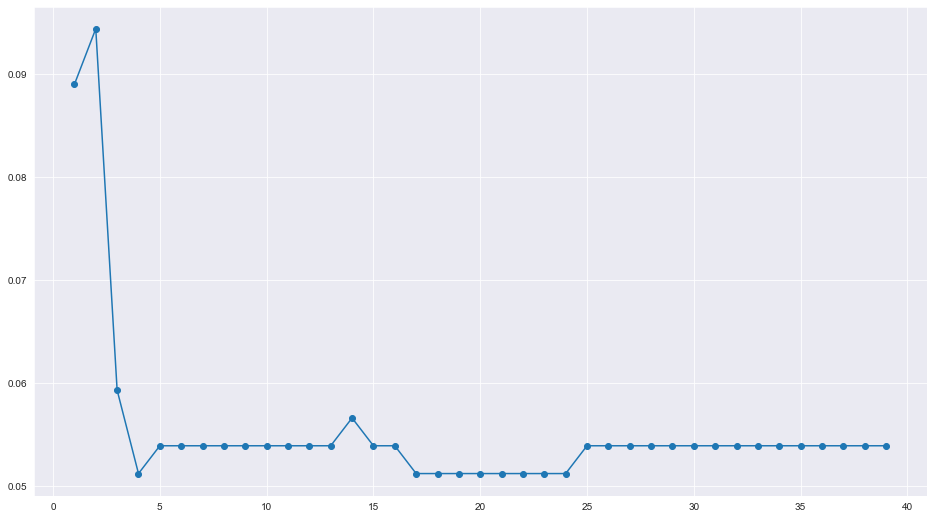

In [154]:
plt.figure(figsize=(16,9))

plt.plot(range(1,40), error, marker='o')

plt.show()

#### <font color='green'>Cette visualisation en forme de coude, aide à définir le nombre de k-clusters. Ici, le choix le plus probant est donc de 4 clusters.</font>

##### KNN:

In [181]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

##### Jeu d'entraînement:

In [182]:
y_train_pred = classifier.predict(x_train)

##### Matrice de confusion:

In [183]:
print(confusion_matrix(y_train, y_train_pred))

[[339  32]
 [ 32 710]]


#### <font color='green'>La matrice de confusion permet de voir les résultats obtenus. On observe, 339 Vrai négatif, 32 faux négatif, 32 faux positif et 710 vrai positif.</font>

##### Classification report:

In [184]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       371
           1       0.96      0.96      0.96       742

    accuracy                           0.94      1113
   macro avg       0.94      0.94      0.94      1113
weighted avg       0.94      0.94      0.94      1113



#### <font color='green'>Le rapport ci-dessus nous aide à mieux comprendre comment on été interprété les résultats obtenus. On observe d'ailleurs une exactitude des résultats à hauteur de 94%</font>

##### Jeu de test:

In [185]:
y_pred = classifier.predict(x_test)

##### Matrice de confusion:

In [186]:
print(confusion_matrix(y_test, y_pred))

[[109   4]
 [ 10 248]]


#### <font color='green'>La matrice de confusion permet de voir les résultats obtenus. On observe, 109 Vrai négatif, 4 faux négatif, 10 faux positif et 248 vrai positif.</font>

##### Classification report:

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.98      0.96      0.97       258

    accuracy                           0.96       371
   macro avg       0.95      0.96      0.96       371
weighted avg       0.96      0.96      0.96       371



#### <font color='green'>Le rapport ci-dessus nous aide à mieux comprendre comment on été interprété les résultats obtenus. On observe d'ailleurs une exactitude des résultats à hauteur de 96%</font>

### Regression logistique

#### La régression logistique, est un algorithme de classification supervisé. Elle permet de classer plusieurs valeurs dans une même classe en déterminant la relation que la valeur a avec les autres. 

##### Data Prep:

In [162]:
z = pca_data.iloc[:,:4].copy()
y = pca_data[['target']]

##### Train Test Split:

In [163]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25)

##### Regression logistique:

In [164]:
logReg = LogisticRegression()

logReg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

##### Jeu d'entraînement:

In [165]:
y_train_pred = logReg.predict(x_train)

##### Matrice de confusion:

In [166]:
print(confusion_matrix(y_train, y_train_pred))

[[332  39]
 [ 27 715]]


#### <font color='green'>La matrice de confusion permet de voir les résultats obtenus. On observe, 332 Vrai négatif, 39 faux négatif, 27 faux positif et 715 vrai positif.</font>

##### Classification report:

In [167]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       371
           1       0.95      0.96      0.96       742

    accuracy                           0.94      1113
   macro avg       0.94      0.93      0.93      1113
weighted avg       0.94      0.94      0.94      1113



#### <font color='green'>Le rapport ci-dessus nous aide à mieux comprendre comment on été interprété les résultats obtenus. On observe d'ailleurs une exactitude des résultats à hauteur de 94%</font>

##### Jeu de test:

In [168]:
y_pred = logReg.predict(x_test)

##### Matrice de confusion:

In [169]:
print(confusion_matrix(y_test, y_pred))

[[107   6]
 [  6 252]]


#### <font color='green'>La matrice de confusion permet de voir les résultats obtenus. On observe, 107 Vrai négatif, 6 faux négatif, 6 faux positif et 252 vrai positif.</font>

##### Classification report:

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       113
           1       0.98      0.98      0.98       258

    accuracy                           0.97       371
   macro avg       0.96      0.96      0.96       371
weighted avg       0.97      0.97      0.97       371



#### <font color='green'>Le rapport ci-dessus nous aide à mieux comprendre comment on été interprété les résultats obtenus. On observe d'ailleurs une exactitude des résultats à hauteur de 97%</font>

### Analyse prédictive

In [215]:
#Import:

df = pd.read_csv('billets_testt.csv', delimiter=';', skiprows=1)
df

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [216]:
#Info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [217]:
#Description:

df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,171.840000,104.068000,103.974000,4.808000,3.172000,112.27400
std,0.225499,0.206325,0.259769,0.707404,0.097826,0.97879
min,171.520000,103.800000,103.730000,3.810000,3.070000,111.10000
25%,171.780000,103.950000,103.750000,4.390000,3.090000,111.82000
50%,171.790000,104.080000,103.990000,5.000000,3.160000,111.87000
75%,172.020000,104.170000,104.030000,5.270000,3.240000,113.19000
max,172.090000,104.340000,104.370000,5.570000,3.300000,113.39000


In [231]:
#Séparation du dataframe

X = df.iloc[:,:-1]
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.09,103.95,103.73,4.39,3.09,113.19
1,171.52,104.17,104.03,5.27,3.16,111.82
2,171.78,103.80,103.75,3.81,3.24,113.39
3,172.02,104.08,103.99,5.57,3.30,111.10
4,171.79,104.34,104.37,5.00,3.07,111.87


In [232]:
#Création d'un pipeline:

pipe = Pipeline([('std', scaler), ('pca', pca2)])

In [233]:
#Vérification des paramètres du pipeline:

pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=4))])>

In [234]:
#Ajuster le pipeline:

X2 = pipe.transform(X)
X2

array([[-0.83122602, -0.31265137, -0.08100435,  0.31121797],
       [ 1.60180705,  1.32005765,  0.49708489, -0.11303299],
       [-1.18214658,  0.72625465, -0.28131046,  0.2790902 ],
       [ 2.25497014, -0.04871119, -0.55258283,  0.64216567],
       [ 1.71030261,  0.15973014,  0.67218696, -1.15071097]])

In [235]:
#Reformer le Dataframe:

X2 = pd.DataFrame(X2)
X2.columns = ['PC1', 'PC2', 'PC3', 'PC4']
X2

,PC1,PC2,PC3,PC4
0,-0.831226,-0.312651,-0.081004,0.311218
1,1.601807,1.320058,0.497085,-0.113033
2,-1.182147,0.726255,-0.281310,0.279090
3,2.254970,-0.048711,-0.552583,0.642166
4,1.710303,0.159730,0.672187,-1.150711


In [236]:
#Prediction:

y_pred2 = logReg.predict(X2)
y_pred2

array([1, 0, 1, 0, 0])

In [237]:
#Resultat:

X2['prediction'] = y_pred2
X2

,PC1,PC2,PC3,PC4,prediction
0,-0.831226,-0.312651,-0.081004,0.311218,1
1,1.601807,1.320058,0.497085,-0.113033,0
2,-1.182147,0.726255,-0.281310,0.279090,1
3,2.254970,-0.048711,-0.552583,0.642166,0
4,1.710303,0.159730,0.672187,-1.150711,0
